In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import matplotlib
import os

In [92]:
df = pd.read_csv('rideshare_kaggle.csv')

In [94]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [96]:
df.head(10)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
5  f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2  1.545071e+09    18   17     12   
6  462816a3-820d-408b-8549-0b39e82f65ac  1.543209e+09     5   26     11   
7  474d6376-bc59-4ec9-bf57-4e6d6faeb165  1.543780e+09    19    2     12   
8  4f9fee41-fde3-4767-bbf1-a00e108701fb  1.543818e+09     6    3     12   
9  8612d909-98b8-4454-a093-30bd48de0cb3  1.543316e+09    10   27     11   

              datetime          timezone            source  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square   
5  2018-12-17 18:25:12  America/New_York  Haymarket Square   
6  2018-11-26 05:03:00  America/New_York          Back Bay   
7  2018-12-02 19:53:04  America/New_York          Back Bay   
8  2018-12-03 06:28:02  America/New_York          Back Bay   
9  2018-11-27 10:45:22  America/New_York          Back Bay   

               destination cab_type    product_id          name  price  \
0            North Station     Lyft     lyft_line        Shared    5.0   
1            North Station     Lyft  lyft_premier           Lux   11.0   
2            North Station     Lyft          lyft          Lyft    7.0   
3            North Station     Lyft   lyft_luxsuv  Lux Black XL   26.0   
4            North Station     Lyft     lyft_plus       Lyft XL    9.0   
5            North Station     Lyft      lyft_lux     Lux Black   16.5   
6  Northeastern University     Lyft     lyft_plus       Lyft XL   10.5   
7  Northeastern University     Lyft      lyft_lux     Lux Black   16.5   
8  Northeastern University     Lyft     lyft_line        Shared    3.0   
9  Northeastern University     Lyft   lyft_luxsuv  Lux Black XL   27.5   

   distance  surge_multiplier  latitude  longitude  temperature  \
0      0.44               1.0   42.2148    -71.033        42.34   
1      0.44               1.0   42.2148    -71.033        43.58   
2      0.44               1.0   42.2148    -71.033        38.33   
3      0.44               1.0   42.2148    -71.033        34.38   
4      0.44               1.0   42.2148    -71.033        37.44   
5      0.44               1.0   42.2148    -71.033        38.75   
6      1.08               1.0   42.3503    -71.081        41.99   
7      1.08               1.0   42.3503    -71.081        49.88   
8      1.08               1.0   42.3503    -71.081        45.58   
9      1.08               1.0   42.3503    -71.081        45.45   

   apparentTemperature    short_summary  \
0                37.12   Mostly Cloudy    
1                37.35            Rain    
2                32.93           Clear    
3                29.63           Clear    
4                30.88   Partly Cloudy    
5                33.51        Overcast    
6                41.99        Overcast    
7                49.22      Light Rain    
8                45.58           Foggy    
9                41.77      Light Rain    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   
5          Light rain in the morning and overnight.            

In [98]:
# Cast datetime into datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [46]:
df['short_summary'].head(10)

0     Mostly Cloudy 
1              Rain 
2             Clear 
3             Clear 
4     Partly Cloudy 
5          Overcast 
6          Overcast 
7        Light Rain 
8             Foggy 
9        Light Rain 
Name: short_summary, dtype: object

In [48]:
import geopandas as gpd
import folium

# Import ".json" file for the U.S. 
country_geo = r'/Users/vinhdao/Downloads/us-states.json'
#load JSON file contents here too:

f = open(r'/Users/vinhdao/Downloads/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [50]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1['latitude'].mean(), df1['longitude'].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

**We can see that the total density has 2 clusters in Boston city and Quincy**

## 2. EDA and Visualization

#### 1. Time Analysis

**-Month Data-**

In [52]:
def plot_graph(groupby_column):
    # Group the DataFrame by the specified column and count occurrences
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    
    # Print the grouped DataFrame
    print(df1)
    
    # Create a bar plot using Matplotlib
    plt.figure(figsize=(15, 6))  # Set the figure size
    plt.bar(df1[groupby_column], df1["counts"], color='orange')  # Create a bar chart
    
    # Add labels and title
    plt.xlabel(groupby_column)
    plt.ylabel("Counts")
    plt.title(f'Counts of {groupby_column}')
    
    # Display the plot
    plt.show()

   month  counts
0     11  286457
1     12  406614


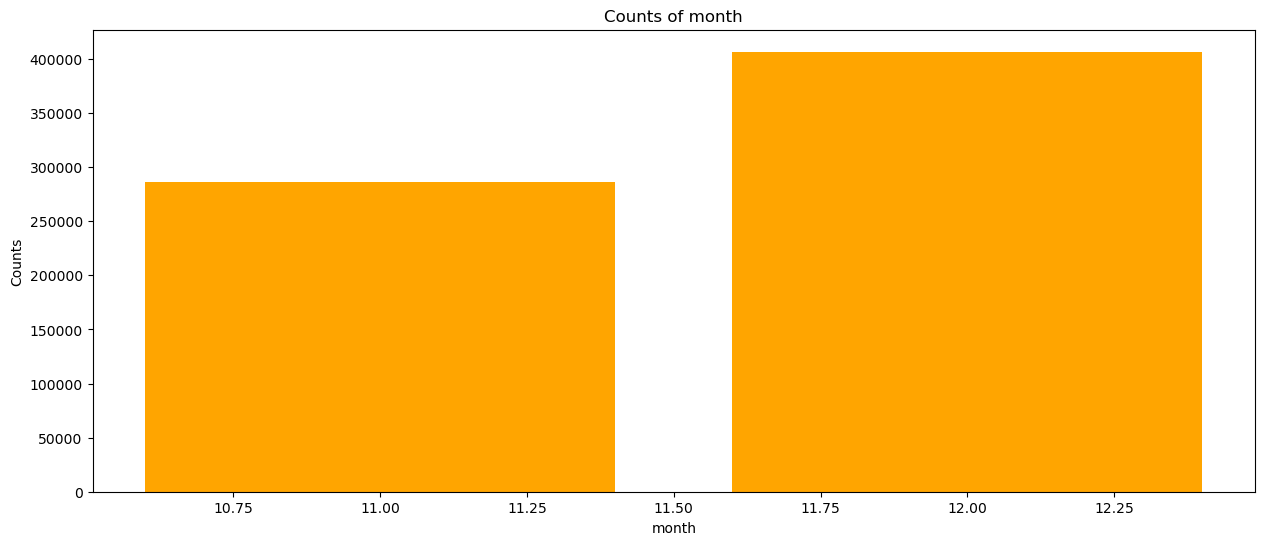

In [54]:
plot_graph('month')

    day  counts
0     1   45240
1     2   44928
2     3   44928
3     4   12636
4     9    1674
5    10    2773
6    13   38531
7    14   44928
8    15   44928
9    16   44928
10   17   44928
11   18   36192
12   26   31587
13   27   76121
14   28   73691
15   29   59974
16   30   45084


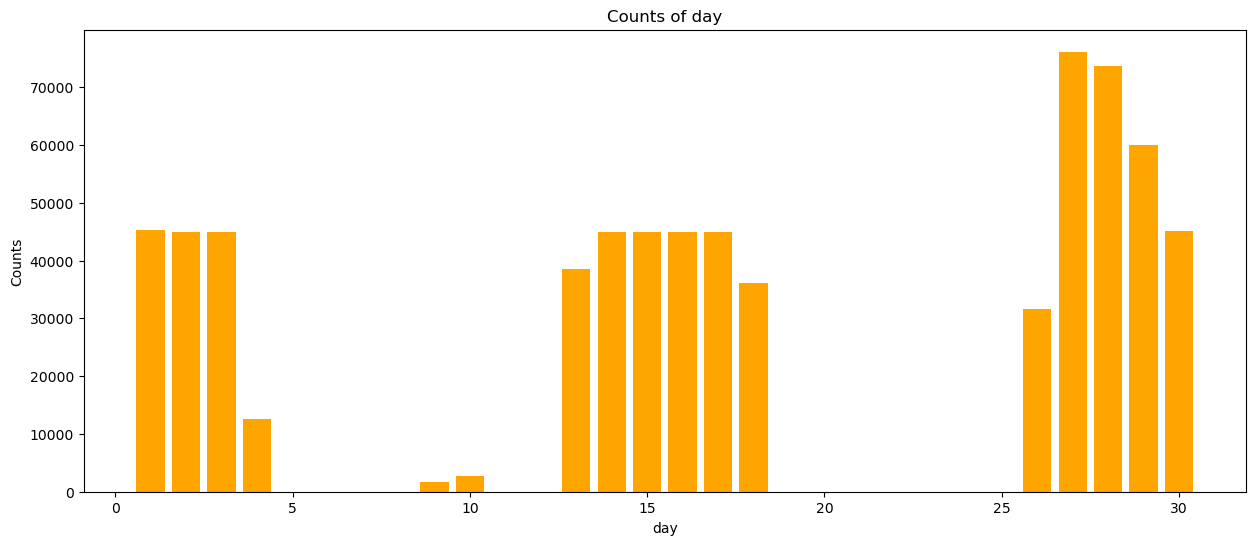

In [56]:
plot_graph('day')

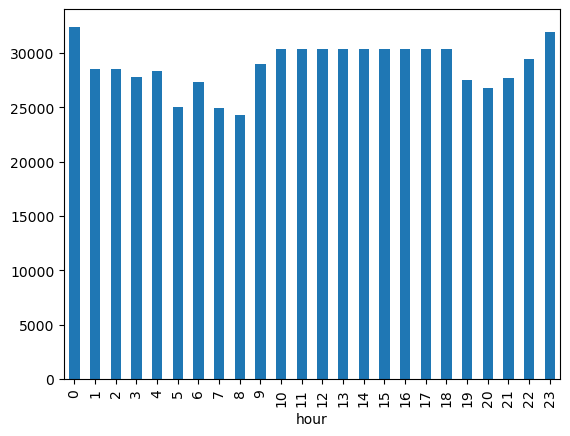

In [58]:
hourg = df['hour'].value_counts().sort_index().plot.bar()

### 2. Source and Destination Analysis

                destination  counts
0                  Back Bay   57780
1               Beacon Hill   57403
2         Boston University   57764
3                    Fenway   57757
4        Financial District   58851
5          Haymarket Square   57764
6                 North End   57756
7             North Station   57119
8   Northeastern University   57755
9             South Station   57749
10         Theatre District   57798
11                 West End   57575


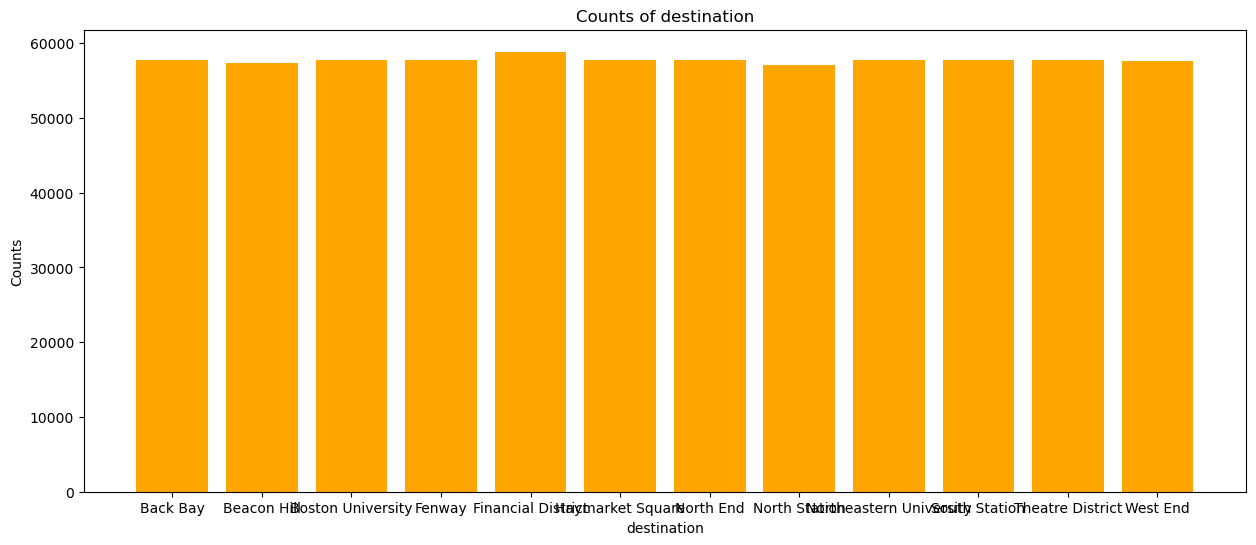

In [102]:
plot_graph('destination')

                     source  counts
0                  Back Bay   57792
1               Beacon Hill   57403
2         Boston University   57764
3                    Fenway   57757
4        Financial District   58857
5          Haymarket Square   57736
6                 North End   57763
7             North Station   57118
8   Northeastern University   57756
9             South Station   57750
10         Theatre District   57813
11                 West End   57562


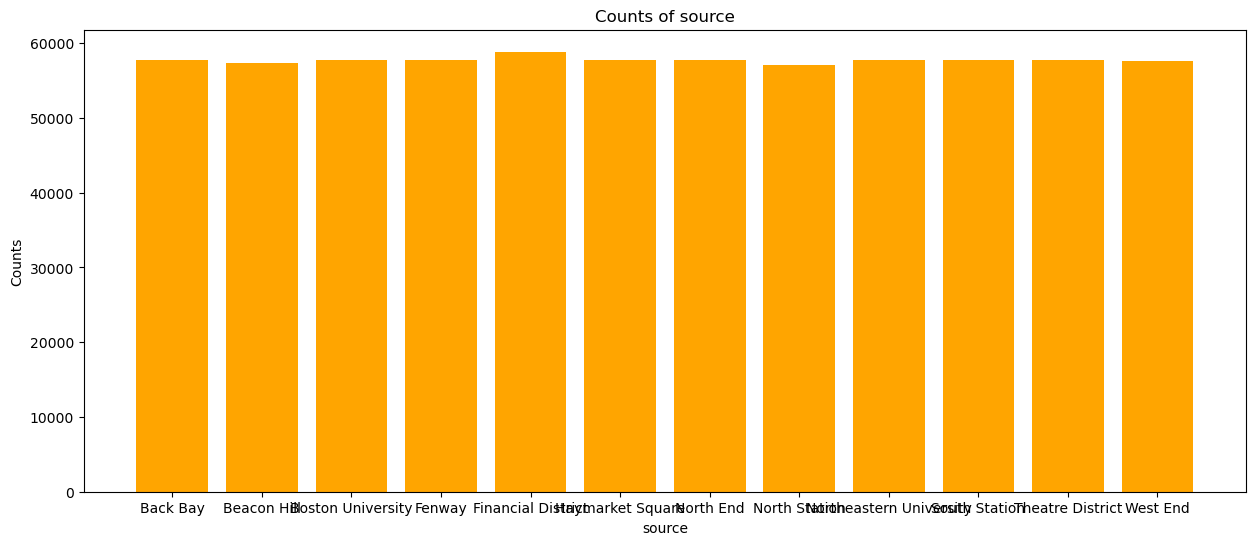

In [104]:
plot_graph('source')

### 3. Price Analysis

In [106]:
df.groupby(by=['source','destination']).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [76]:
print('Maximum price in our data :',df['price'].max())
print('Detail about the maximum price')
df[df['price'] == df['price'].max()]
df[df['price']==df.price.max()][['latitude','longitude']]

Maximum price in our data : 97.5
Detail about the maximum price


latitude  longitude
597071   42.3503    -71.081

In [78]:
# Locate the maximum price fare
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

In [80]:
print('Minimum price in our data :',df['price'].min())
print('Detail about the min price')
df[df['price'] == df['price'].min()]

Minimum price in our data : 2.5
Detail about the min price


id     timestamp  hour  day  month  \
5901    f6ed86e6-c3f1-42f5-9ce9-bb4bea19f18e  1.543448e+09    23   28     11   
7370    5c77b1f4-dbd3-4533-8ba9-ddc4af2ad740  1.545134e+09    11   18     12   
8623    9da5d7c6-cbf6-4dc9-a69f-3c57893ade01  1.543440e+09    21   28     11   
16675   1ad71e9a-d990-49be-8b77-6e94fb40f260  1.543299e+09     6   27     11   
17032   93192aa7-f773-4127-9a02-ab52d061d26a  1.543459e+09     2   29     11   
20774   fb98185d-1f47-430b-a734-2b79b20161ea  1.545058e+09    14   17     12   
21042   7801b002-5f2b-4586-97d5-eada6f5c154c  1.543231e+09    11   26     11   
34810   0a740c9e-1ddd-4df0-b68c-796f69fbfe42  1.545109e+09     4   18     12   
35036   a05258e1-ec25-48fc-9e67-d1c664c7505b  1.543344e+09    18   27     11   
36008   749360d2-1ac2-4b0a-9736-f5a947d24c40  1.545103e+09     3   18     12   
40126   54664c4b-c803-4cc5-9e2a-24d276e56bc7  1.543716e+09     2    2     12   
40379   36b64631-c3a7-4316-8760-b00a720aef72  1.543658e+09     9    1     12   
42296   93eae2c6-5513-4e0a-8739-0373a8d019f0  1.545061e+09    15   17     12   
48762   b7119f7c-ba08-4a62-957c-8514266b5ea9  1.545124e+09     9   18     12   
55268   e00851d7-3212-4ac1-b21e-4b731e2f5328  1.543457e+09     2   29     11   
56724   07f74cce-7a91-4e90-ba5e-c9482db37b2a  1.543443e+09    22   28     11   
56829   704e27e9-cf71-4754-9628-05272c5b0f62  1.543762e+09    14    2     12   
58240   26c34084-3c52-4908-9b42-ab9820c55ea4  1.543398e+09     9   28     11   
62949   2f441216-95bd-4f23-b1b3-1e599b30f7b4  1.544688e+09     7   13     12   
64194   4c7636b4-0abc-4486-ad56-c0b9a51d7c0a  1.545153e+09    17   18     12   
70222   bc67ac59-e97c-4ecd-9d83-152278c401e3  1.543452e+09     0   29     11   
72507   7fa5877c-70cb-44f1-8855-95172a3b1687  1.543828e+09     9    3     12   
74088   9a3816ba-2c84-4edb-a944-50f16d9559f9  1.543834e+09    10    3     12   
75149   c5cdf1e5-0432-4667-836a-e58fb718554c  1.544724e+09    18   13     12   
75421   aa2e2f73-093e-453d-aecc-69db60da8e25  1.543572e+09     9   30     11   
76691   8f1056ce-01d7-4d6c-ac17-5d0eec7f3734  1.544728e+09    19   13     12   
86262   29e11ebb-28dd-4241-9281-c8fcf8f9f5ab  1.543341e+09    17   27     11   
87851   eb00e3b0-5525-4ceb-bb33-a4cfe828f13f  1.543549e+09     3   30     11   
88710   7790658a-25a9-4a5d-a129-0d56cf1d9055  1.544773e+09     7   14     12   
90868   9e806fa0-8eb1-4fdd-91eb-f58ce917a3de  1.545068e+09    17   17     12   
94217   adbb51c5-7145-487b-8525-62573a77fc5c  1.543441e+09    21   28     11   
102194  ac2e7863-8f44-4f37-9c2d-cd6682e3dc48  1.543713e+09     1    2     12   
104633  bd302519-cc05-497d-b04b-f86f84f48d26  1.544809e+09    17   14     12   
106612  1696e300-e0f0-4722-9a57-7da261bb38c2  1.543279e+09     0   27     11   
108670  0f7b57d5-e11c-42da-a9f7-e01ff5a313d6  1.544831e+09    23   14     12   
109015  b960c520-f664-47e6-8c0c-a84eb82b96c0  1.543599e+09    17   30     11   
116453  857d1e2f-32b7-4e03-84bd-41d44a10fbf9  1.545117e+09     7   18     12   
120716  9369ea2e-8b94-4861-b15c-b0555708a24a  1.543815e+09     5    3     12   
128015  5456c74f-de59-4d12-8127-d3b48ab7f978  1.543566e+09     8   30     11   
131115  c334dafb-b82b-42ab-a55b-8e2a0eb39a78  1.544817e+09    19   14     12   
138901  093db387-22f3-4496-a34b-9a85381ed9d4  1.543429e+09    18   28     11   
143291  23bdb298-6b26-4f23-b23a-520bdaea3d5e  1.545082e+09    21   17     12   
147218  ff80e7eb-4b5b-415f-9b38-48decc880509  1.545034e+09     8   17     12   
149251  f69c2394-5094-42a8-8f21-1d86e2c3f097  1.545009e+09     1   17     12   
149404  ab2fe421-0422-457f-8b58-6fc2a17732c4  1.544846e+09     3   15     12   
152495  7e13f5b0-74dc-4d1b-8783-50bdc3eaf31a  1.544739e+09    22   13     12   
152912  cf075770-a945-4c85-83d1-0335a8d3ece3  1.544781e+09     9   14     12   
157517  6dac703e-71c8-47d5-a243-14f51d85da17  1.543545e+09     2   30     11   
157887  b07967a3-3a9d-4b54-91a7-9c0b18b58e31  1.543225e+09     9   26     11   
162740  704ea62e-64a9-4642-9a65-3d04986aad

### 4. Cab Type Analysis

  cab_type  counts
0     Lyft  307408
1     Uber  385663


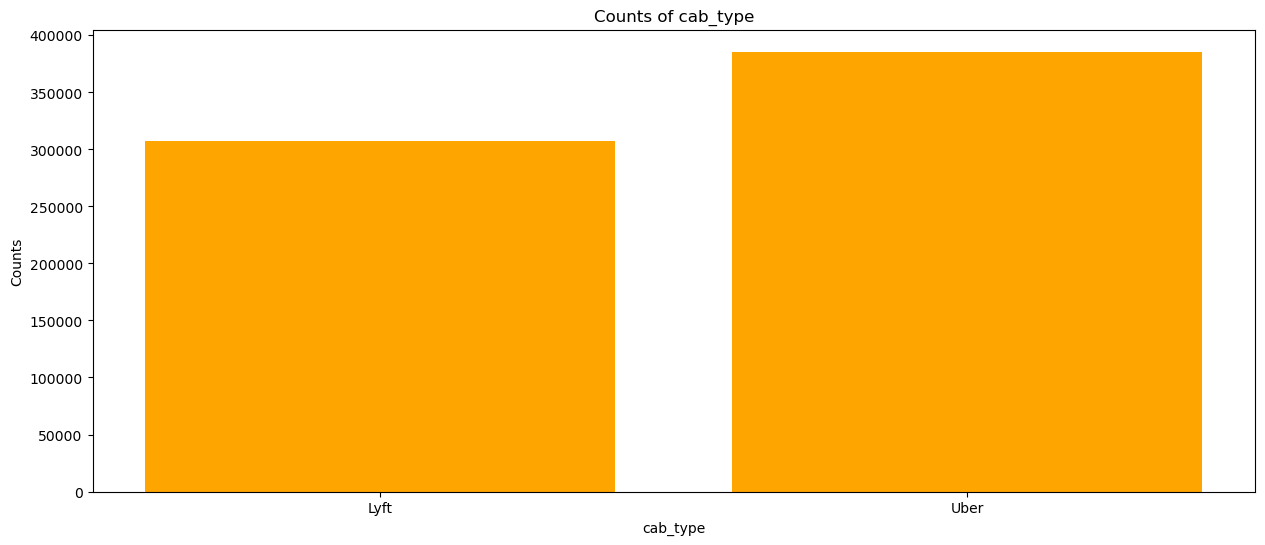

In [182]:
plot_graph('cab_type')

## 3. Feature Engineering

### 1. Removing unnecessary features

In [108]:
# Checking if two columns are same 
check = (df['visibility'] == df['visibility.1']).all()
check

True

Because the column above are the same, we will drop the column

In [115]:
df.drop(['visibility.1'], axis=1, inplace = True)

In [188]:
numeric_cols = df.columns[df.dtypes != object]
categorical_cols = df.columns[df.dtypes == object]

In [190]:
print('numeric_cols = ',len(numeric_cols))
print('categorical_cols = ',len(categorical_cols))

numeric_cols =  47
categorical_cols =  10


I also remove the uneccessary columns that not need for our model

In [117]:
df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','temperatureHigh','temperatureMax','apparentTemperatureHigh','apparentTemperatureMax'],axis=1, inplace = True)

In [119]:
df.head(5).T

0                 1  \
hour                                        9                 2   
day                                        16                27   
month                                      12                11   
timezone                     America/New_York  America/New_York   
source                       Haymarket Square  Haymarket Square   
destination                     North Station     North Station   
cab_type                                 Lyft              Lyft   
product_id                          lyft_line      lyft_premier   
name                                   Shared               Lux   
price                                     5.0              11.0   
distance                                 0.44              0.44   
surge_multiplier                          1.0               1.0   
latitude                              42.2148           42.2148   
longitude                             -71.033           -71.033   
temperature                             42.34             43.58   
apparentTemperature                     37.12             37.35   
short_summary                  Mostly Cloudy              Rain    
precipIntensity                           0.0            0.1299   
precipProbability                         0.0               1.0   
humidity                                 0.68              0.94   
windSpeed                                8.66             11.98   
windGust                                 9.17             11.98   
visibility                               10.0             4.786   
temperatureHighTime                1544968800        1543251600   
temperatureLow                          34.19              42.1   
apparentTemperatureLow                  27.39              36.2   
icon                     partly-cloudy-night              rain    
dewPoint                                 32.7             41.83   
pressure                              1021.98           1003.97   
windBearing                                57                90   
cloudCover                               0.72               1.0   
uvIndex                                     0                 0   
ozone                                   303.8             291.1   
moonPhase                                 0.3              0.64   
precipIntensityMax                     0.1276              0.13   
temperatureMin                          39.89             40.49   
apparentTemperatureMin                  33.73              36.2   

                                       2                 3  \
hour                                   1                 4   
day                                   28                30   
month                                 11                11   
timezone                America/New_York  America/New_York   
source                  Haymarket Square  Haymarket Square   
destination                North Station     North Station   
cab_type                            Lyft              Lyft   
product_id                          lyft       lyft_luxsuv   
name                                Lyft      Lux Black XL   
price                                7.0              26.0   
distance                            0.44              0.44   
surge_multiplier                     1.0               1.0   
latitude                         42.2148           42.2148   
longitude                        -71.033           -71.033   
temperature                        38.33             34.38   
apparentTemperature                32.93             29.63   
short_summary                     Clear             Clear    
precipIntensity                      0.0               0.0   
precipProbability                    0.0               0.0   
humidity                            0.75              0.73   
windSpeed                           7.33              5.28   
windGust                            7.33              5.28   
visibility                          10.0              10.0   
temperatu

In [72]:
cab_type = df['cab_type'].value_counts()
cab_type

cab_type
Uber    135469
Lyft    102466
Name: count, dtype: int64

In [74]:
round(df.groupby(['cab_type', 'name'])['price'].sum().sort_values(ascending=False),2)

cab_type  name        
Uber      Black SUV       580172.50
Lyft      Lux Black XL    520765.85
Uber      Black           391416.00
Lyft      Lux Black       371876.35
Uber      Taxi            317682.95
          UberXL          301633.50
Lyft      Lux             287842.50
          Lyft XL         246297.50
Uber      WAV             187114.50
          UberX           186501.00
          UberPool        167661.50
Lyft      Lyft            157336.85
          Shared          109644.50
Name: price, dtype: float64

#### 1. Correlation between temperature and price

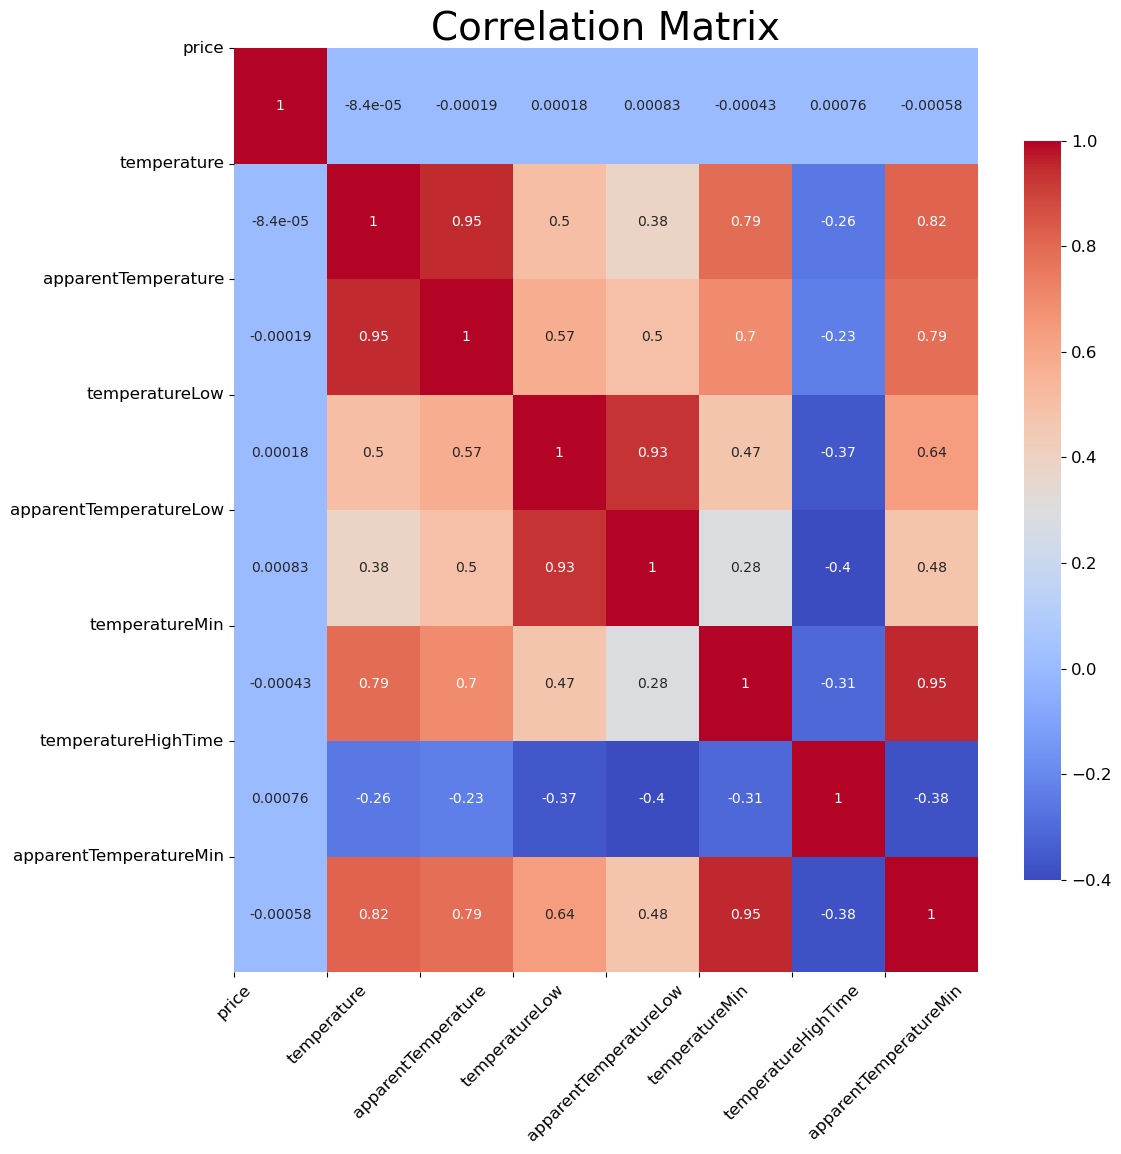

In [123]:
corr = ['price','temperature','apparentTemperature','temperatureLow',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','apparentTemperatureMin']
cor = df[corr].corr()

# Set up the figure size and create a detailed heatmap with labels and color bar
f, ax = plt.subplots(figsize=(12, 12))  # Set figure size

# Generate a heatmap with annotations, a color map, and correlation values displayed
sns.heatmap(cor, annot=True, cmap='coolwarm', ax=ax, cbar_kws={'shrink': 0.8})  # Add colorbar with shrink factor

# Set x and y ticks with customized labels and font sizes
plt.xticks(ticks=range(cor.shape[1]), labels=cor.columns, fontsize=12, rotation=45)  # Adjust x-axis labels
plt.yticks(ticks=range(cor.shape[0]), labels=cor.columns, fontsize=12)  # Adjust y-axis labels

# Customize the colorbar (legend) font size
colorbar = ax.collections[0].colorbar  # Access the colorbar
colorbar.ax.tick_params(labelsize=12)  # Set font size for colorbar labels

# Add a descriptive title to the plot with a larger font size
plt.title('Correlation Matrix', fontsize=28)

# Show the plot
plt.show()


In [125]:
cor['price'].sort_values()

apparentTemperatureMin   -0.000580
temperatureMin           -0.000428
apparentTemperature      -0.000193
temperature              -0.000084
temperatureLow            0.000182
temperatureHighTime       0.000759
apparentTemperatureLow    0.000831
price                     1.000000
Name: price, dtype: float64

The near-zero correlation between the selected columns and 'price' suggests a negligible linear relationship. Consequently, these variables are unlikely to play a meaningful role in explaining variations in 'price' and can be excluded from further analysis.

In [131]:
df.drop(['temperature','apparentTemperature','temperatureLow',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','apparentTemperatureMin'],axis=1,inplace=True)
df.head(5)

KeyError: "['temperature', 'apparentTemperature', 'temperatureLow', 'apparentTemperatureLow', 'temperatureMin', 'temperatureHighTime', 'apparentTemperatureMin'] not found in axis"

#### 2. Correlation between climate features and price

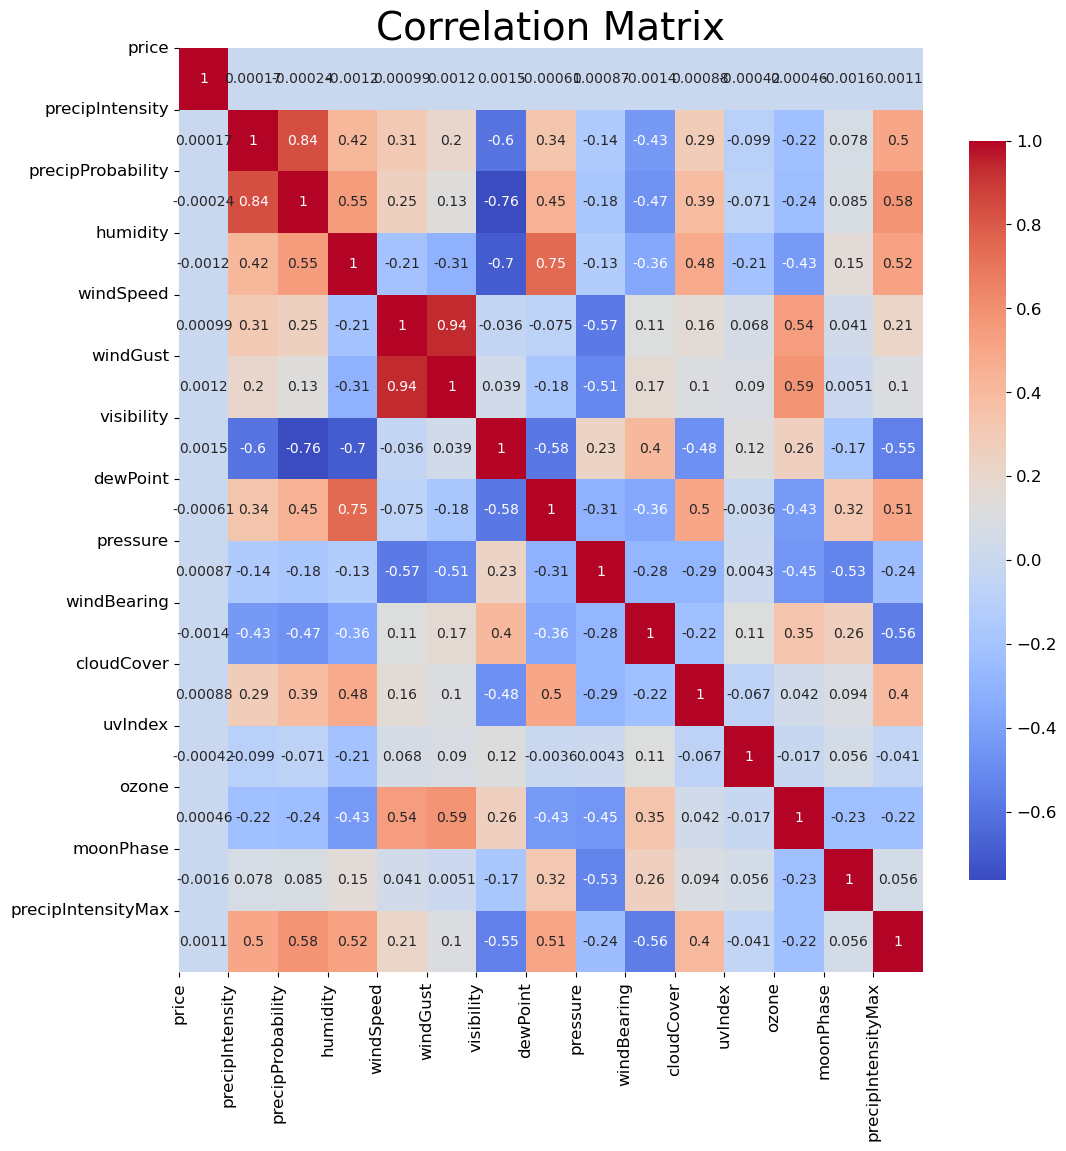

In [136]:
# We will investigate the other factors influence the price of ride

corr =['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax']

cor = df[corr].corr()
# Set up the figure size and create a detailed heatmap with labels and color bar
f, ax = plt.subplots(figsize=(12, 12))  # Set figure size

# Generate a heatmap with annotations, a color map, and correlation values displayed
sns.heatmap(cor, annot=True, cmap='coolwarm', ax=ax, cbar_kws={'shrink': 0.8})  # Add colorbar with shrink factor

# Set x and y ticks with customized labels and font sizes
plt.xticks(ticks=range(cor.shape[1]), labels=cor.columns, fontsize=12, rotation=90)  # Adjust x-axis labels
plt.yticks(ticks=range(cor.shape[0]), labels=cor.columns, fontsize=12)  # Adjust y-axis labels

# Customize the colorbar (legend) font size
colorbar = ax.collections[0].colorbar  # Access the colorbar
colorbar.ax.tick_params(labelsize=12)  # Set font size for colorbar labels

# Add a descriptive title to the plot with a larger font size
plt.title('Correlation Matrix', fontsize=28)

# Show the plot
plt.show()


In [138]:
cor['price'].sort_values()

moonPhase            -0.001602
windBearing          -0.001382
humidity             -0.001238
dewPoint             -0.000615
uvIndex              -0.000424
precipProbability    -0.000243
precipIntensity       0.000166
ozone                 0.000460
pressure              0.000866
cloudCover            0.000883
windSpeed             0.000990
precipIntensityMax    0.001114
windGust              0.001218
visibility            0.001497
price                 1.000000
Name: price, dtype: float64

In [140]:
df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1,inplace=True)

The near-zero correlation between the selected columns and 'price' suggests a negligible linear relationship. Consequently, these variables are unlikely to play a meaningful role in explaining variations in 'price' and can be excluded from further analysis.

In [142]:
df.head(5)

hour  day  month          timezone            source    destination  \
0     9   16     12  America/New_York  Haymarket Square  North Station   
1     2   27     11  America/New_York  Haymarket Square  North Station   
2     1   28     11  America/New_York  Haymarket Square  North Station   
3     4   30     11  America/New_York  Haymarket Square  North Station   
4     3   29     11  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude    short_summary                   icon  
0   42.2148    -71.033   Mostly Cloudy    partly-cloudy-night   
1   42.2148    -71.033            Rain                   rain   
2   42.2148    -71.033           Clear            clear-night   
3   42.2148    -71.033           Clear            clear-night   
4   42.2148    -71.033   Partly Cloudy    partly-cloudy-night

#### 3. Check the categorical value

In [148]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

From the above, we can see that the 'timezone' columns has only 1 column and the column 'product_id'. We can exclude it from our analysis

In [151]:
df.drop(['timezone','product_id'],axis=1, inplace = True)

**We also want to conduct our analysis to understand the correlation between categoricald with  feature (price)**

In [156]:
cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = df[cat]
df_cat.head()

source    destination cab_type          name    short_summary  \
0  Haymarket Square  North Station     Lyft        Shared   Mostly Cloudy    
1  Haymarket Square  North Station     Lyft           Lux            Rain    
2  Haymarket Square  North Station     Lyft          Lyft           Clear    
3  Haymarket Square  North Station     Lyft  Lux Black XL           Clear    
4  Haymarket Square  North Station     Lyft       Lyft XL   Partly Cloudy    

                    icon  price  
0   partly-cloudy-night     5.0  
1                  rain    11.0  
2           clear-night     7.0  
3           clear-night    26.0  
4   partly-cloudy-night     9.0

In [160]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
corr = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax']
cor = df[corr].corr()

# Set up the figure size and create a detailed heatmap with labels and color bar
f, ax = plt.subplots(figsize=(12, 12))  # Set figure size

# Generate a heatmap with annotations, a color map, and correlation values displayed
sns.heatmap(cor, annot=True, cmap= 'Blues', ax=ax, cbar_kws={'shrink': 0.8})  # Add colorbar with shrink factor

# Set x and y ticks with customized labels and font sizes
plt.xticks(ticks=range(cor.shape[1]), labels=cor.columns, fontsize=12, rotation=90)  # Adjust x-axis labels
plt.yticks(ticks=range(cor.shape[0]), labels=cor.columns, fontsize=12)  # Adjust y-axis labels

# Customize the colorbar (legend) font size
colorbar = ax.collections[0].colorbar  # Access the colorbar
colorbar.ax.tick_params(labelsize=12)  # Set font size for colorbar labels

# Add a descriptive title to the plot with a larger font size
plt.title('Correlation Matrix', fontsize=28)

# Show the plot
plt.show()


In [38]:
cor['price'].sort_values()

moonPhase                 -0.001171
pressure                  -0.000927
ozone                      0.001306
precipIntensityMax         0.001884
temperatureLow             0.001896
apparentTemperatureHigh    0.002348
apparentTemperatureMin     0.003450
temperatureMin             0.004260
apparentTemperatureLow     0.004517
temperatureHigh            0.004813
cloudCover                 0.004955
dewPoint                   0.005359
price                      1.000000
Name: price, dtype: float64

In [92]:
df.drop(['apparentTemperatureMin','ozone',
 'moonPhase','precipIntensityMax','temperatureMin','temperatureHigh',
 'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
          'dewPoint','pressure','cloudCover'],axis=1,inplace=True)
df

source              destination cab_type  \
0       Haymarket Square            North Station     Lyft   
1       Haymarket Square            North Station     Lyft   
2       Haymarket Square            North Station     Lyft   
3               Back Bay  Northeastern University     Lyft   
4               Back Bay  Northeastern University     Lyft   
...                  ...                      ...      ...   
237930          West End                North End     Uber   
237931          West End                North End     Uber   
237932          West End                North End     Uber   
237933          West End                North End     Uber   
237934          West End                North End     Uber   

                                  product_id          name      price  \
0                                       lyft          Lyft   7.000000   
1                                lyft_luxsuv  Lux Black XL  26.000000   
2                                  lyft_plus       Lyft XL   9.000000   
3                               lyft_premier           Lux  13.500000   
4                                       lyft          Lyft   7.000000   
...                                      ...           ...        ...   
237930  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  13.000000   
237931  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   9.500000   
237932  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  16.545125   
237933  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  27.000000   
237934  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  10.000000   

        distance  surge_multiplier  latitude  longitude  temperature  \
0           0.44               1.0   42.2148   -71.0330        38.33   
1           0.44               1.0   42.2148   -71.0330        34.38   
2           0.44               1.0   42.2148   -71.0330        37.44   
3           1.08               1.0   42.3503   -71.0810        40.13   
4           1.08               1.0   42.3503   -71.0810        41.47   
...          ...               ...       ...        ...          ...   
237930      1.00               1.0   42.3519   -71.0643        37.05   
237931      1.00               1.0   42.3519   -71.0643        37.05   
237932      1.00               1.0   42.3519   -71.0643        37.05   
237933      1.00               1.0   42.3519   -71.0643        37.05   
237934      1.00               1.0   42.3519   -71.0643        37.05   

        apparentTemperature    short_summary  precipIntensity  \
0                     32.93           Clear               0.0   
1                     29.63           Clear               0.0   
2                     30.88   Partly Cloudy               0.0   
3                     38.00           Clear               0.0   
4                     35.66        Overcast               0.0   
...                     ...              ...              ...   
237930                37.05   Partly Cloudy               0.0   
237931                37.05   Partly Cloudy               0.0   
237932                37.05   Partly Cloudy               0.0   
237933                37.05   Partly Cloudy               0.0   
237934                37.05   Partly Cloudy               0.0   

        precipProbability  humidity  windSpeed  windGust  visibility  \
0                     0.0      0.75       7.33      7.33      10.000   
1                     0.0      0.73       5.28      5.28      10.000   
2                     0.0      0.70       9.14      9.14      10.000   
3                     0.0      0.62       3.46      4.47       9.920   
4                     0.0      0.63       9.54     14.86      10.000   
...                   ...       ...        ...       ...         ...   
237930                0.0      0.74       2.34      2.87       9.785   
237931                0.0      0.74       2.34      2.87       9.785   
237932                0.0      0.74       2.34      2.87       9.785   
237933                0.0     

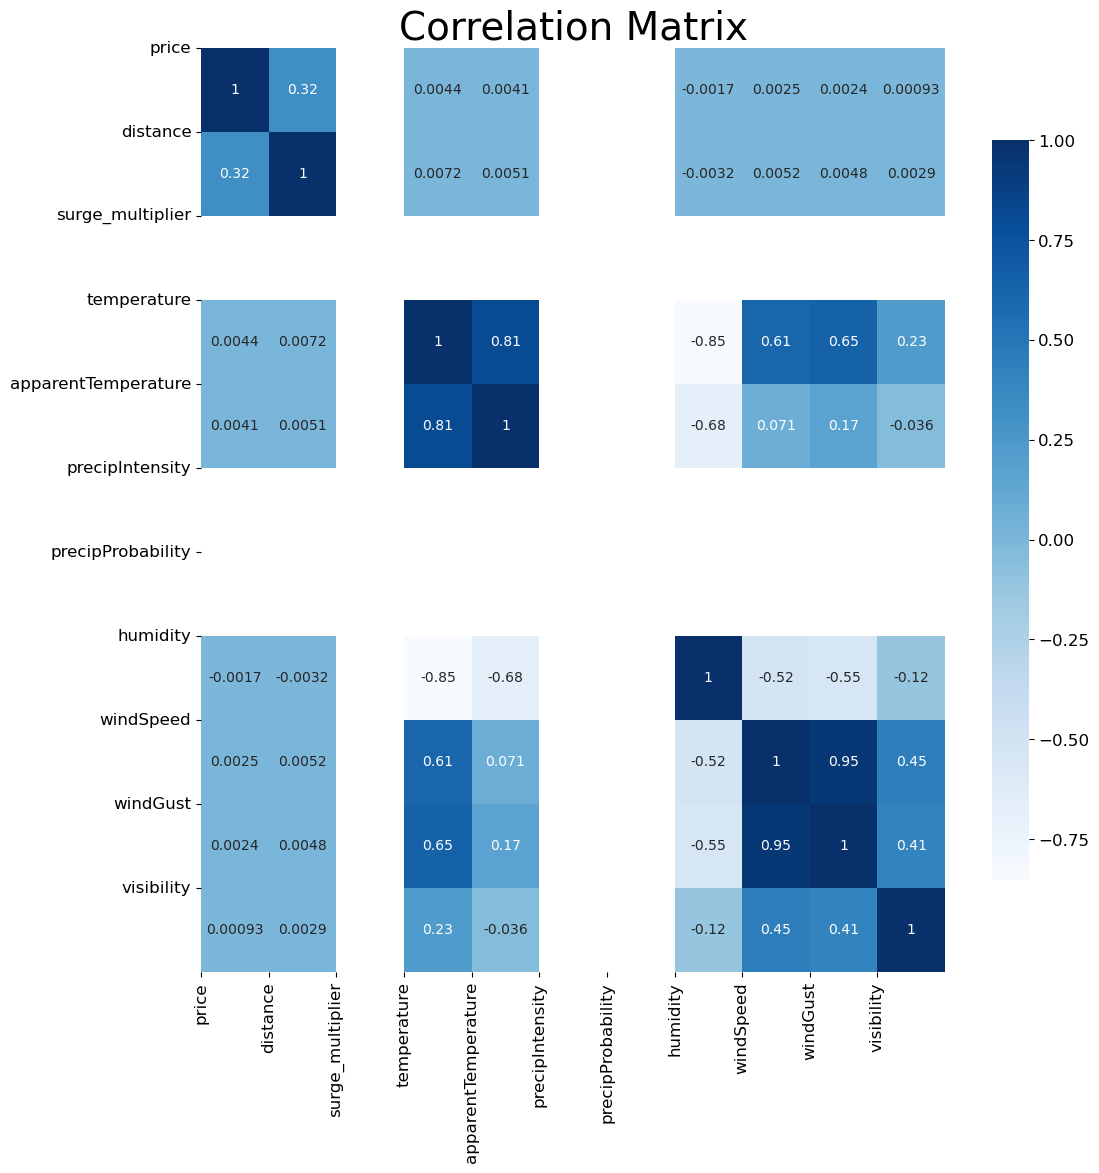

In [94]:
corr = ['price', 'distance','surge_multiplier','temperature','apparentTemperature',
 'precipIntensity','precipProbability','humidity','windSpeed','windGust','visibility']
cor = df[corr].corr()

# Set up the figure size and create a detailed heatmap with labels and color bar
f, ax = plt.subplots(figsize=(12, 12))  # Set figure size

# Generate a heatmap with annotations, a color map, and correlation values displayed
sns.heatmap(cor, annot=True, cmap= 'Blues', ax=ax, cbar_kws={'shrink': 0.8})  # Add colorbar with shrink factor

# Set x and y ticks with customized labels and font sizes
plt.xticks(ticks=range(cor.shape[1]), labels=cor.columns, fontsize=12, rotation=90)  # Adjust x-axis labels
plt.yticks(ticks=range(cor.shape[0]), labels=cor.columns, fontsize=12)  # Adjust y-axis labels

# Customize the colorbar (legend) font size
colorbar = ax.collections[0].colorbar  # Access the colorbar
colorbar.ax.tick_params(labelsize=12)  # Set font size for colorbar labels

# Add a descriptive title to the plot with a larger font size
plt.title('Correlation Matrix', fontsize=28)

# Show the plot
plt.show()

In [96]:
cor['price'].sort_values()

humidity              -0.001653
visibility             0.000932
windGust               0.002354
windSpeed              0.002471
apparentTemperature    0.004120
temperature            0.004445
distance               0.320700
price                  1.000000
surge_multiplier            NaN
precipIntensity             NaN
precipProbability           NaN
Name: price, dtype: float64

The following columns have a constant value and will not be included in the correlation matrix:
'surge_multiplier', 'precipIntensity', 'precipProbability', also we will only keep the distance as it only columns that show the relationship to the price

In [98]:
df.drop(['windSpeed', 'windGust','temperature', 'visibility','humidity', 'apparentTemperature'],axis=1,inplace=True)
df

source              destination cab_type  \
0       Haymarket Square            North Station     Lyft   
1       Haymarket Square            North Station     Lyft   
2       Haymarket Square            North Station     Lyft   
3               Back Bay  Northeastern University     Lyft   
4               Back Bay  Northeastern University     Lyft   
...                  ...                      ...      ...   
237930          West End                North End     Uber   
237931          West End                North End     Uber   
237932          West End                North End     Uber   
237933          West End                North End     Uber   
237934          West End                North End     Uber   

                                  product_id          name      price  \
0                                       lyft          Lyft   7.000000   
1                                lyft_luxsuv  Lux Black XL  26.000000   
2                                  lyft_plus       Lyft XL   9.000000   
3                               lyft_premier           Lux  13.500000   
4                                       lyft          Lyft   7.000000   
...                                      ...           ...        ...   
237930  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  13.000000   
237931  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   9.500000   
237932  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  16.545125   
237933  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  27.000000   
237934  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  10.000000   

        distance  surge_multiplier  latitude  longitude    short_summary  \
0           0.44               1.0   42.2148   -71.0330           Clear    
1           0.44               1.0   42.2148   -71.0330           Clear    
2           0.44               1.0   42.2148   -71.0330   Partly Cloudy    
3           1.08               1.0   42.3503   -71.0810           Clear    
4           1.08               1.0   42.3503   -71.0810        Overcast    
...          ...               ...       ...        ...              ...   
237930      1.00               1.0   42.3519   -71.0643   Partly Cloudy    
237931      1.00               1.0   42.3519   -71.0643   Partly Cloudy    
237932      1.00               1.0   42.3519   -71.0643   Partly Cloudy    
237933      1.00               1.0   42.3519   -71.0643   Partly Cloudy    
237934      1.00               1.0   42.3519   -71.0643   Partly Cloudy    

        precipIntensity  precipProbability  temperatureLowTime  \
0                   0.0                0.0          1543402800   
1                   0.0                0.0          1543579200   
2                   0.0                0.0          1543478400   
3                   0.0                0.0          1543665600   
4                   0.0                0.0          1543485600   
...                 ...                ...                 ...   
237930              0.0                0.0          1543712400   
237931              0.0                0.0          1543712400   
237932              0.0                0.0          1543712400   
237933              0.0                0.0          1543712400   
237934              0.0                0.0          1543712400   

        apparentTemperatureLowTime                   icon  temperatureMinTime  \
0                       1543392000           clear-night           1543377600   
1                       1543575600           clear-night           1543550400   
2                       1543460400   partly-cloudy-night           1543402800   
3                       1543658400             clear-day           1543579200   
4                       1543478400                cloudy           1543399200   
...                            ...                    ...                 ...   
237930                  1543712400   partly-cloudy-night           1543658400   
237931                  1543712400   partl

In [64]:
df

hour  day  month            source              destination cab_type  \
0          1   28     11  Haymarket Square            North Station     Lyft   
1          4   30     11  Haymarket Square            North Station     Lyft   
2          3   29     11  Haymarket Square            North Station     Lyft   
3         16   30     11          Back Bay  Northeastern University     Lyft   
4         19   28     11          Back Bay  Northeastern University     Lyft   
...      ...  ...    ...               ...                      ...      ...   
237930    23    1     12          West End                North End     Uber   
237931    23    1     12          West End                North End     Uber   
237932    23    1     12          West End                North End     Uber   
237933    23    1     12          West End                North End     Uber   
237934    23    1     12          West End                North End     Uber   

                                  product_id          name      price  \
0                                       lyft          Lyft   7.000000   
1                                lyft_luxsuv  Lux Black XL  26.000000   
2                                  lyft_plus       Lyft XL   9.000000   
3                               lyft_premier           Lux  13.500000   
4                                       lyft          Lyft   7.000000   
...                                      ...           ...        ...   
237930  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  13.000000   
237931  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   9.500000   
237932  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  16.545125   
237933  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  27.000000   
237934  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  10.000000   

        distance  surge_multiplier    short_summary  precipIntensity  \
0           0.44               1.0           Clear               0.0   
1           0.44               1.0           Clear               0.0   
2           0.44               1.0   Partly Cloudy               0.0   
3           1.08               1.0           Clear               0.0   
4           1.08               1.0        Overcast               0.0   
...          ...               ...              ...              ...   
237930      1.00               1.0   Partly Cloudy               0.0   
237931      1.00               1.0   Partly Cloudy               0.0   
237932      1.00               1.0   Partly Cloudy               0.0   
237933      1.00               1.0   Partly Cloudy               0.0   
237934      1.00               1.0   Partly Cloudy               0.0   

        precipProbability  windGustTime  temperatureHighTime  \
0                     0.0    1543334400           1543320000   
1                     0.0    1543514400           1543510800   
2                     0.0    1543446000           1543420800   
3                     0.0    1543554000           1543600800   
4                     0.0    1543431600           1543438800   
...                   ...           ...                  ...   
237930                0.0    1543672800           1543690800   
237931                0.0    1543672800           1543690800   
237932                0.0    1543672800           1543690800   
237933                0.0    1543672800           1543690800   
237934                0.0    1543672800           1543690800   

        temperatureLowTime  apparentTemperatureHighTime  \
0               1543402800                   1543320000   
1               1543579200                   1543510800   
2               1543478400                   1543420800   
3               1543665600                   1543611600   
4               1543485600                   1543438800   
...                    ...                          ...   
237930          1543712400                   1543690800   
237931          1543712400                   1543690800   
23793

In [66]:
df.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'short_summary', 'precipIntensity', 'precipProbability', 'windGustTime',
       'temperatureHighTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'icon',
       'temperatureMinTime', 'apparentTemperatureMinTime'],
      dtype='object')

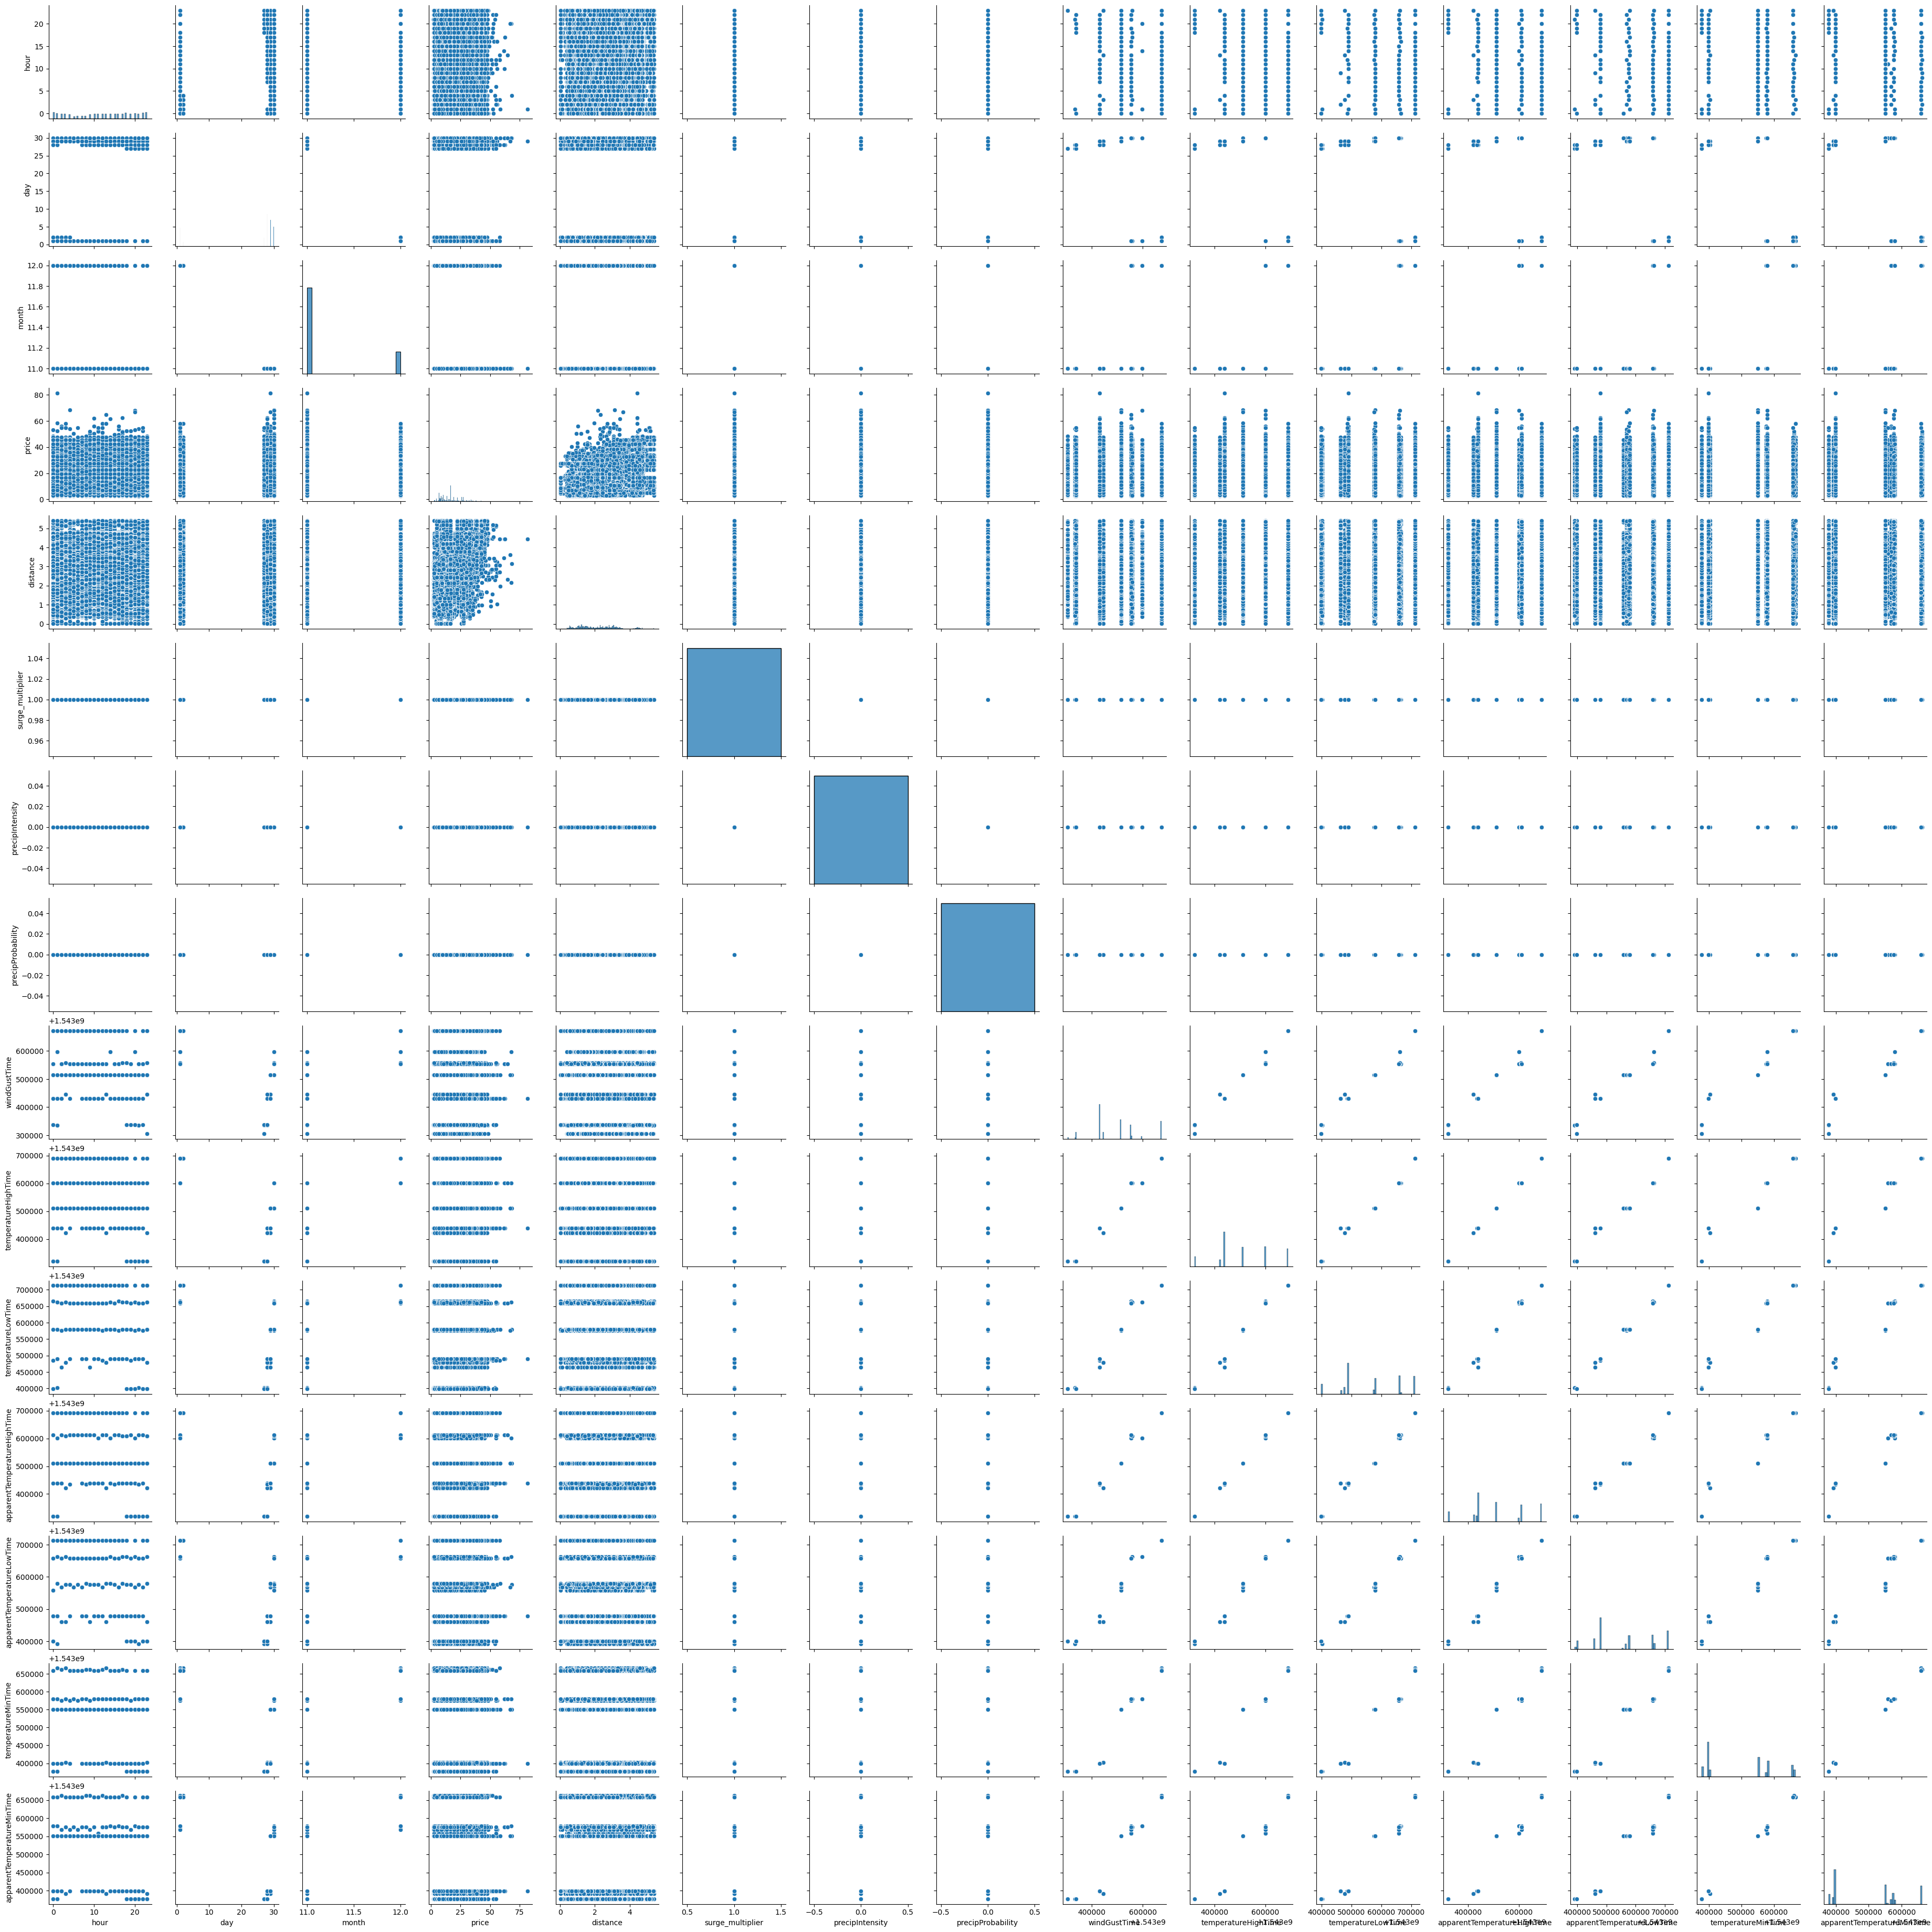

In [68]:
# Create a pair plot 

g = sns.pairplot(df)

plt.savefig("out.png") 

<Axes: >

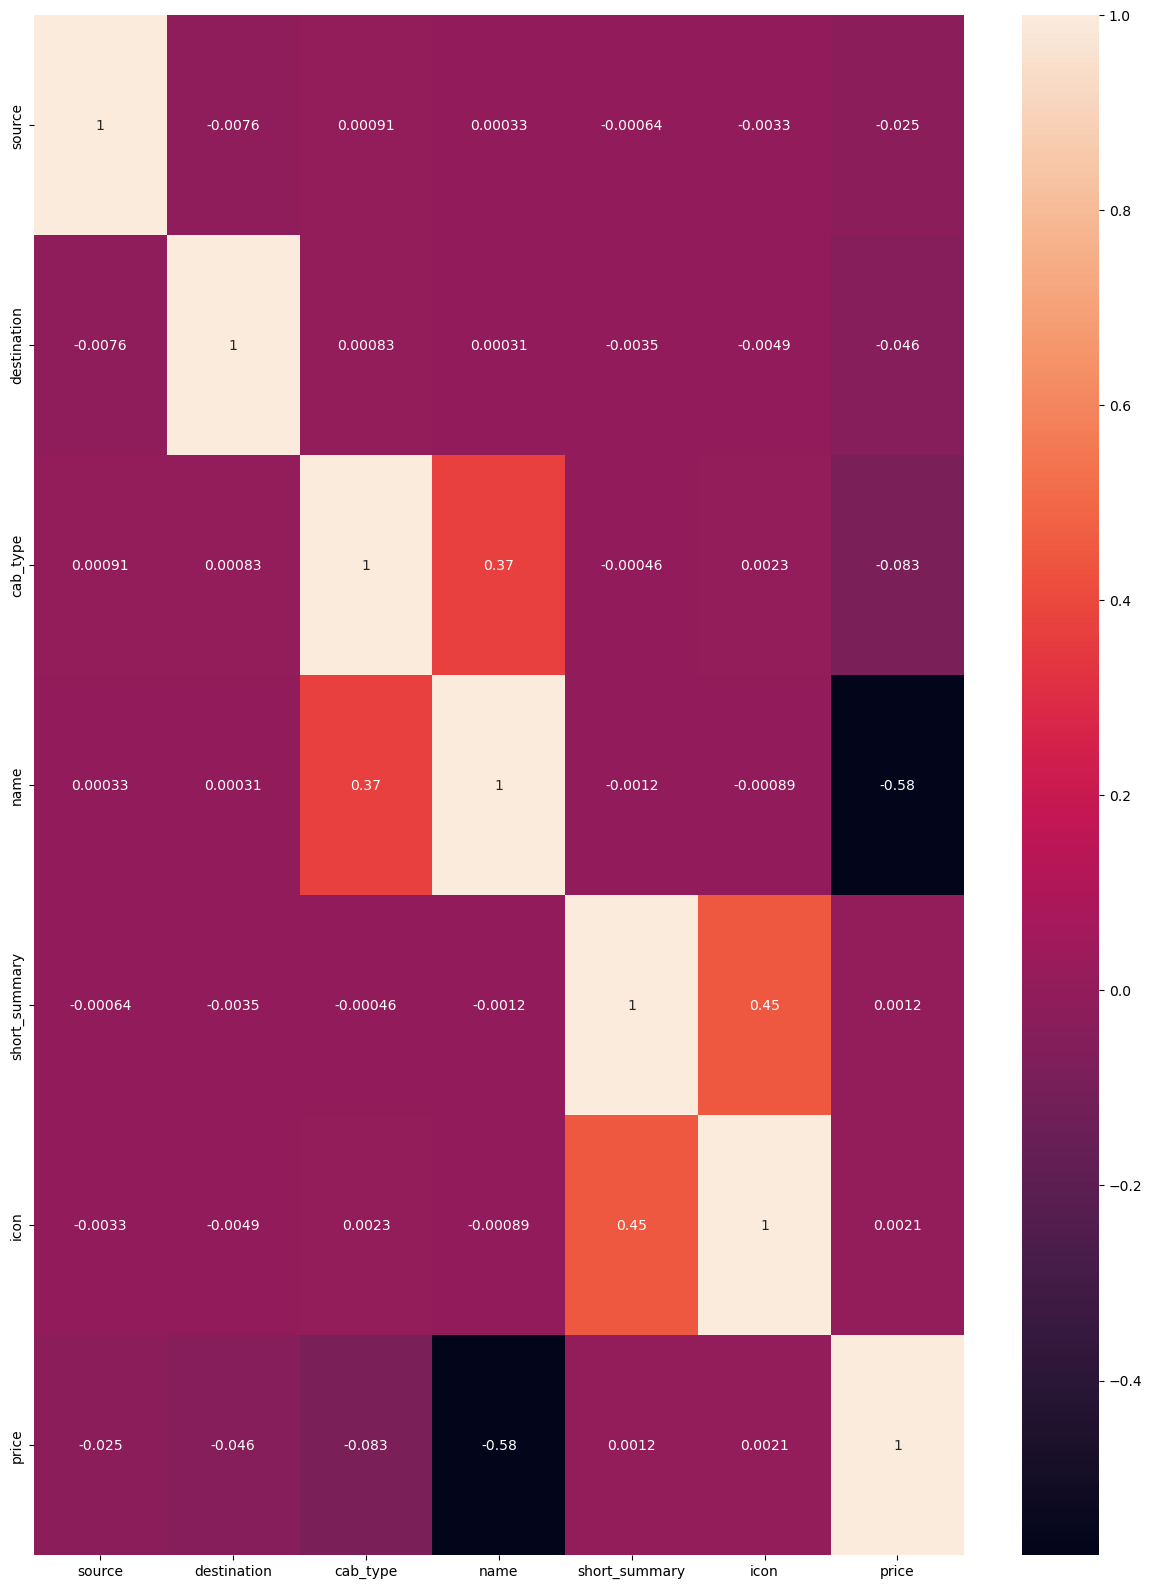

In [163]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

**After analyzing the data, we find that only the 'name' feature shows a relatively strong correlation with the target variable. The features 'source', 'destination', and 'cab_type' exhibit weaker correlations. However, since 'cab_type' has a stronger correlation compared to the other two, I will include it in the model. Consequently, I will remove the remaining columns from the dataset.**

In [173]:
df.drop(['source','destination','short_summary','icon'],axis=1, inplace = True)

In [175]:
df.head(5)

hour  day  month cab_type          name  price  distance  surge_multiplier  \
0     9   16     12     Lyft        Shared    5.0      0.44               1.0   
1     2   27     11     Lyft           Lux   11.0      0.44               1.0   
2     1   28     11     Lyft          Lyft    7.0      0.44               1.0   
3     4   30     11     Lyft  Lux Black XL   26.0      0.44               1.0   
4     3   29     11     Lyft       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  
0   42.2148    -71.033  
1   42.2148    -71.033  
2   42.2148    -71.033  
3   42.2148    -71.033  
4   42.2148    -71.033

**For modelling, I don't need the data for time and geographical, so I will delete them from dataset**

In [178]:
df.drop(['hour','day','month','latitude','longitude'],axis=1, inplace = True)

In [180]:
df.head(5)

cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0

**We also need to remove the outliers from our dataset**

In [168]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)

In [170]:
drop_outliers(df, 'price')

In [188]:
df_train = df
df_train.head(5)

cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0

In [192]:
# Drop rows with any missing values
df_train = df_train.dropna()


## 4. Modelling

In [194]:
# Import Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Separate features and target variable
X = df_train.drop(columns=['price'])
y = df_train['price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ]
)

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets BEFORE fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


R² Score: 0.9281
Mean Squared Error (MSE): 6.2015
Root Mean Squared Error (RMSE): 2.4903


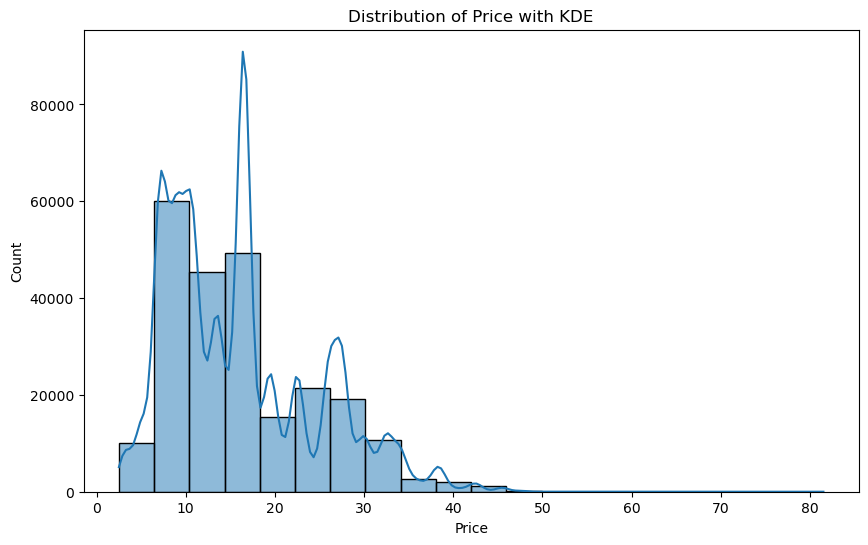

In [70]:
# Now create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Distribution of Price with KDE')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [200]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the first few rows
print(comparison_df.head(30))


        Actual  Predicted
677566    19.5  21.059604
308691    10.5  11.569266
396241     5.0   8.191407
136589    16.5  16.854972
198998    38.5  33.451551
179736    16.5  16.043660
311934    30.5  29.054451
510750    19.5  19.260934
6135      13.5  12.173002
313476    10.5  13.805556
651578     8.5  10.631601
517643    10.0  11.163150
42495      5.0   3.491389
244646     9.0   9.271293
602877     8.0   7.992633
12726      9.0   9.131412
535302     6.5   4.336934
411789    22.5  19.568673
652341     8.5   5.655689
315358     7.0   5.550446
46278     34.0  30.733571
565992    24.0  22.178656
544092    24.0  23.885210
490149     9.0   7.992633
397064    23.5  20.947698
240752    22.5  20.100223
282791     6.5   5.204199
340592    28.5  30.229998
394657    34.0  34.234888
656168    27.5  25.921648


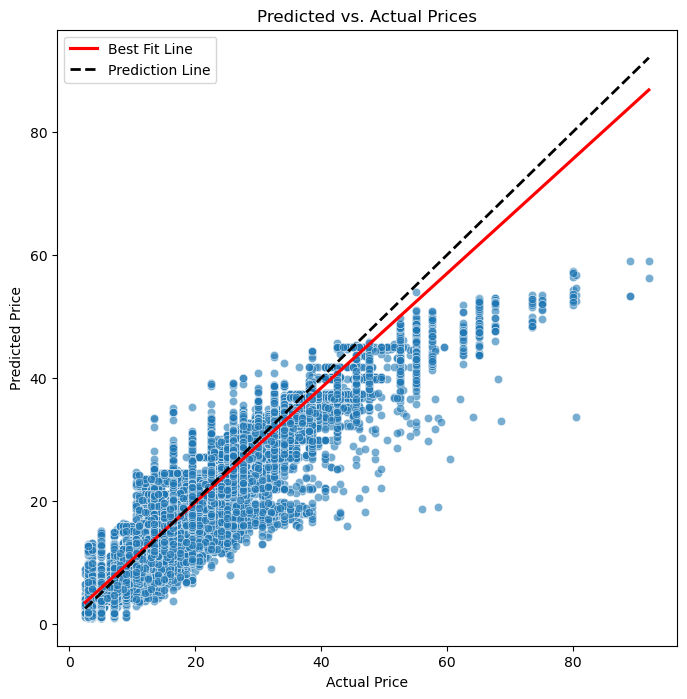

In [212]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)



# Plotting predicted vs. actual prices with best fit line
plt.figure(figsize=(8, 8))

sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.6)
sns.regplot(x='Actual', y='Predicted', data=comparison_df, scatter=False, color='red', label='Best Fit Line')

# Perfect prediction reference line
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         'k--', lw=2, label='Prediction Line')

plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


### **We can see that with R^2 roughly 93%. The predicted line is close to actual prices**